R-squared score: 0.5971429737359591


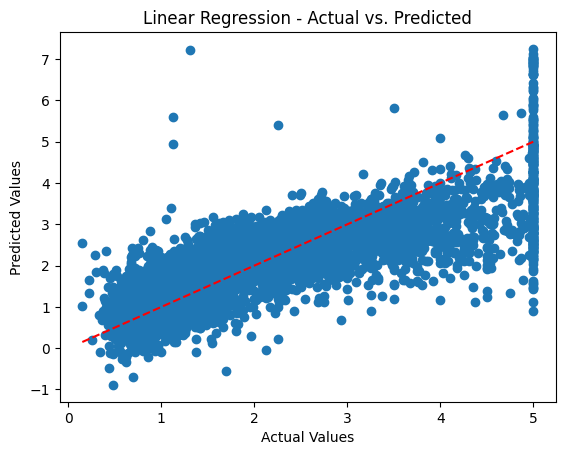

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch California housing dataset
housing = fetch_california_housing()
column_names = housing.feature_names
x = housing.data
y = housing.target 
df = pd.DataFrame(x, columns=column_names)
df["label"] = y

# Drop outliers
df = df.drop(df[df['MedInc'] > 7.5].index)
df = df.drop(df[df['AveRooms'] > 8].index)
df = df.drop(df[df['AveRooms'] < 2.2].index)
df = df.drop(df[df['AveBedrms'] > 1.2].index)
df = df.drop(df[df['AveBedrms'] < 0.9].index)
df = df.drop(df[df['Population'] > 2770].index)
df = df.drop(df[df['AveOccup'] > 4.3].index)
df = df.drop(df[df['AveOccup'] < 1.20].index)

# Normalize the data
scaler = MinMaxScaler()
df[column_names] = scaler.fit_transform(df[column_names])

# Set the 'label' column as the index
df.set_index("label", inplace=True)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate the model's score on the test set
score = model.score(x_test, y_test)
print("R-squared score:", score)

# Create a scatter plot of the predicted values vs. the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Actual vs. Predicted')

# Add the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.show()